In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('Airline_review.csv')

# Dropping first two column of entry ID and airline_name
df = df.iloc[:, 2:]

df.head()

,Review,Type Of Traveller,Seat Type,Seat Comfort,Cabin Staff Service,Food & Beverages,Ground Service,Inflight Entertainment,Wifi & Connectivity,Value For Money,Recommended,Total Score,Review Period,sentiment,sentiment_score
0,moroni moheli . turned pretty decent airline ....,Solo Leisure,Economy Class,4.0,5.0,4.0,4.0,2.0,1.0,3.0,yes,23.0,0,1,0.9217
1,moroni anjouan . small airline . ticket advise...,Solo Leisure,Economy Class,2.0,2.0,1.0,1.0,2.0,1.0,2.0,no,11.0,0,0,-0.0258
2,anjouan dzaoudzi . small airline airline based...,Solo Leisure,Economy Class,2.0,1.0,1.0,1.0,2.0,1.0,2.0,no,10.0,0,1,0.8264
3,please favor fly adria . route munich pristina...,Solo Leisure,Economy Class,1.0,1.0,2.0,1.0,2.0,1.0,1.0,no,9.0,0,0,-0.9054
4,book flight airline ! friend returned sofia am...,Couple Leisure,Economy Class,1.0,1.0,1.0,1.0,1.0,1.0,1.0,no,7.0,0,1,0.5255


In [ ]:
df['Review Period'].value_counts()

1    11743
0    11428
Name: Review Period, dtype: int64

In [ ]:
clustering_pre_covid = df[df['Review Period']==0]
clustering_post_covid = df[df['Review Period']==1]

print("Total rows in Pre-Covid Dataframe:")
print(clustering_pre_covid.shape[0])
print("Total rows in Post-Covid Dataframe:")
print(clustering_post_covid.shape[0])

Total rows in Pre-Covid Dataframe:
11428
Total rows in Post-Covid Dataframe:
11743


In [ ]:
clustering_pre_covid.head()

,Review,Type Of Traveller,Seat Type,Seat Comfort,Cabin Staff Service,Food & Beverages,Ground Service,Inflight Entertainment,Wifi & Connectivity,Value For Money,Recommended,Total Score,Review Period,sentiment,sentiment_score
0,moroni moheli . turned pretty decent airline ....,Solo Leisure,Economy Class,4.0,5.0,4.0,4.0,2.0,1.0,3.0,yes,23.0,0,1,0.9217
1,moroni anjouan . small airline . ticket advise...,Solo Leisure,Economy Class,2.0,2.0,1.0,1.0,2.0,1.0,2.0,no,11.0,0,0,-0.0258
2,anjouan dzaoudzi . small airline airline based...,Solo Leisure,Economy Class,2.0,1.0,1.0,1.0,2.0,1.0,2.0,no,10.0,0,1,0.8264
3,please favor fly adria . route munich pristina...,Solo Leisure,Economy Class,1.0,1.0,2.0,1.0,2.0,1.0,1.0,no,9.0,0,0,-0.9054
4,book flight airline ! friend returned sofia am...,Couple Leisure,Economy Class,1.0,1.0,1.0,1.0,1.0,1.0,1.0,no,7.0,0,1,0.5255


In [ ]:
clustering_pre_covid.drop(['Review Period', 'Review'], axis=1, inplace=True)

/shared-libs/python3.9/py/lib/python3.9/site-packages/pandas/core/frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [ ]:
clustering_pre_covid.head()

,Type Of Traveller,Seat Type,Seat Comfort,Cabin Staff Service,Food & Beverages,Ground Service,Inflight Entertainment,Wifi & Connectivity,Value For Money,Recommended,Total Score,sentiment,sentiment_score
0,Solo Leisure,Economy Class,4.0,5.0,4.0,4.0,2.0,1.0,3.0,yes,23.0,1,0.9217
1,Solo Leisure,Economy Class,2.0,2.0,1.0,1.0,2.0,1.0,2.0,no,11.0,0,-0.0258
2,Solo Leisure,Economy Class,2.0,1.0,1.0,1.0,2.0,1.0,2.0,no,10.0,1,0.8264
3,Solo Leisure,Economy Class,1.0,1.0,2.0,1.0,2.0,1.0,1.0,no,9.0,0,-0.9054
4,Couple Leisure,Economy Class,1.0,1.0,1.0,1.0,1.0,1.0,1.0,no,7.0,1,0.5255


In [ ]:
# we can see that the scale for the column 'Total Score' is much larger than the rest of the columns
# hence we will scale the data using StandardScaler to ensure that the data is on the same scale
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
col_name = ['Total Score']
features = clustering_pre_covid[col_name]
scaler.fit(features)
features = scaler.transform(features.values)

clustering_pre_covid[col_name] = features
clustering_pre_covid.head()


/shared-libs/python3.9/py/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/tmp/ipykernel_102/1711187061.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clustering_pre_covid[col_name] = features
/shared-libs/python3.9/py/lib/python3.9/site-packages/pandas/core/indexing.py:1738: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)


,Type Of Traveller,Seat Type,Seat Comfort,Cabin Staff Service,Food & Beverages,Ground Service,Inflight Entertainment,Wifi & Connectivity,Value For Money,Recommended,Total Score,sentiment,sentiment_score
0,Solo Leisure,Economy Class,4.0,5.0,4.0,4.0,2.0,1.0,3.0,yes,1.028668,1,0.9217
1,Solo Leisure,Economy Class,2.0,2.0,1.0,1.0,2.0,1.0,2.0,no,-0.775263,0,-0.0258
2,Solo Leisure,Economy Class,2.0,1.0,1.0,1.0,2.0,1.0,2.0,no,-0.925591,1,0.8264
3,Solo Leisure,Economy Class,1.0,1.0,2.0,1.0,2.0,1.0,1.0,no,-1.075918,0,-0.9054
4,Couple Leisure,Economy Class,1.0,1.0,1.0,1.0,1.0,1.0,1.0,no,-1.376574,1,0.5255


In [ ]:
prepared_clustering_pre_covid = pd.get_dummies(clustering_pre_covid, columns=['Type Of Traveller', 'Seat Type', 'Recommended', 'sentiment'], prefix=['Traveller', 'Seat', 'Recommended', 'sentiment'])


In [ ]:
prepared_clustering_pre_covid.head()

,Seat Comfort,Cabin Staff Service,Food & Beverages,Ground Service,Inflight Entertainment,Wifi & Connectivity,Value For Money,Total Score,sentiment_score,Traveller_Business,...,Traveller_Other Type of Travellers,Traveller_Solo Leisure,Seat_Business Class,Seat_Economy Class,Seat_First Class,Seat_Premium Economy,Recommended_no,Recommended_yes,sentiment_0,sentiment_1
0,4.0,5.0,4.0,4.0,2.0,1.0,3.0,1.028668,0.9217,0,...,0,1,0,1,0,0,0,1,0,1
1,2.0,2.0,1.0,1.0,2.0,1.0,2.0,-0.775263,-0.0258,0,...,0,1,0,1,0,0,1,0,1,0
2,2.0,1.0,1.0,1.0,2.0,1.0,2.0,-0.925591,0.8264,0,...,0,1,0,1,0,0,1,0,0,1
3,1.0,1.0,2.0,1.0,2.0,1.0,1.0,-1.075918,-0.9054,0,...,0,1,0,1,0,0,1,0,1,0
4,1.0,1.0,1.0,1.0,1.0,1.0,1.0,-1.376574,0.5255,0,...,0,0,0,1,0,0,1,0,0,1


In [ ]:
clustering_post_covid.drop(['Review Period', 'Review'], axis=1, inplace=True)
clustering_post_covid.head()

/shared-libs/python3.9/py/lib/python3.9/site-packages/pandas/core/frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,Type Of Traveller,Seat Type,Seat Comfort,Cabin Staff Service,Food & Beverages,Ground Service,Inflight Entertainment,Wifi & Connectivity,Value For Money,Recommended,Total Score,sentiment,sentiment_score
94,Family Leisure,Economy Class,2.0,1.0,1.0,1.0,4.0,2.0,1.0,no,12.0,0,-0.5707
95,Couple Leisure,Economy Class,3.0,1.0,3.0,1.0,2.0,1.0,1.0,no,12.0,0,-0.8199
96,Family Leisure,Economy Class,2.0,3.0,3.0,2.0,1.0,1.0,2.0,yes,14.0,1,0.0000
97,Couple Leisure,Premium Economy,3.0,2.0,2.0,2.0,2.0,1.0,2.0,no,14.0,1,0.1955
98,Couple Leisure,Economy Class,1.0,1.0,1.0,1.0,1.0,1.0,1.0,no,7.0,0,-0.9595


In [ ]:
scaler = StandardScaler()
col_name = ['Total Score']
features = clustering_post_covid[col_name]
scaler.fit(features)
features = scaler.transform(features.values)

clustering_post_covid[col_name] = features
clustering_post_covid.head()

/shared-libs/python3.9/py/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/tmp/ipykernel_102/3170259487.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clustering_post_covid[col_name] = features
/shared-libs/python3.9/py/lib/python3.9/site-packages/pandas/core/indexing.py:1738: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)


,Type Of Traveller,Seat Type,Seat Comfort,Cabin Staff Service,Food & Beverages,Ground Service,Inflight Entertainment,Wifi & Connectivity,Value For Money,Recommended,Total Score,sentiment,sentiment_score
94,Family Leisure,Economy Class,2.0,1.0,1.0,1.0,4.0,2.0,1.0,no,-0.407275,0,-0.5707
95,Couple Leisure,Economy Class,3.0,1.0,3.0,1.0,2.0,1.0,1.0,no,-0.407275,0,-0.8199
96,Family Leisure,Economy Class,2.0,3.0,3.0,2.0,1.0,1.0,2.0,yes,-0.133708,1,0.0000
97,Couple Leisure,Premium Economy,3.0,2.0,2.0,2.0,2.0,1.0,2.0,no,-0.133708,1,0.1955
98,Couple Leisure,Economy Class,1.0,1.0,1.0,1.0,1.0,1.0,1.0,no,-1.091192,0,-0.9595


In [ ]:
prepared_clustering_post_covid = pd.get_dummies(clustering_post_covid, columns=['Type Of Traveller', 'Seat Type', 'Recommended', 'sentiment'], prefix=['Traveller', 'Seat', 'Recommended', 'sentiment'])
prepared_clustering_post_covid.head()

,Seat Comfort,Cabin Staff Service,Food & Beverages,Ground Service,Inflight Entertainment,Wifi & Connectivity,Value For Money,Total Score,sentiment_score,Traveller_Business,...,Traveller_Other Type of Travellers,Traveller_Solo Leisure,Seat_Business Class,Seat_Economy Class,Seat_First Class,Seat_Premium Economy,Recommended_no,Recommended_yes,sentiment_0,sentiment_1
94,2.0,1.0,1.0,1.0,4.0,2.0,1.0,-0.407275,-0.5707,0,...,0,0,0,1,0,0,1,0,1,0
95,3.0,1.0,3.0,1.0,2.0,1.0,1.0,-0.407275,-0.8199,0,...,0,0,0,1,0,0,1,0,1,0
96,2.0,3.0,3.0,2.0,1.0,1.0,2.0,-0.133708,0.0000,0,...,0,0,0,1,0,0,0,1,0,1
97,3.0,2.0,2.0,2.0,2.0,1.0,2.0,-0.133708,0.1955,0,...,0,0,0,0,0,1,1,0,0,1
98,1.0,1.0,1.0,1.0,1.0,1.0,1.0,-1.091192,-0.9595,0,...,0,0,0,1,0,0,1,0,1,0


KMeans clustering for pre-covid data

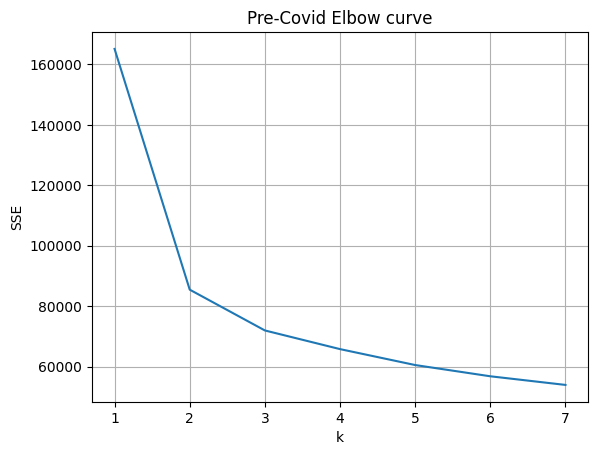

In [ ]:
from sklearn.cluster import KMeans

SSE = []
for i in range(1, 8):
    model_i = KMeans(n_clusters=i, random_state=42)
    model_i.fit(prepared_clustering_pre_covid)
    SSE.append(model_i.inertia_)

# Plot the elbow curve

k = (range(1,8))
plt.plot(k, SSE)

plt.title('Pre-Covid Elbow curve')
plt.xlabel('k')
plt.ylabel('SSE')
plt.grid(True)
plt.show()

In [ ]:
# We can see that the major areas where the elbow curve is flattening is at k=4. For this project, we will be using k=4.

kmeans_cluster_pre = KMeans(n_clusters=4, random_state=42)
kmeans_cluster_pre.fit(prepared_clustering_pre_covid)

KMeans(n_clusters=4, random_state=42)

In [ ]:
print("Attributes of the clustering solution for k=4 in the pre-covid data:")
print("SSE :", round(kmeans_cluster_pre.inertia_, 1))
print("Num of iterations :" , kmeans_cluster_pre.n_iter_)
print("\nCluster centers :" , kmeans_cluster_pre.cluster_centers_)

Attributes of the clustering solution for k=4 in the pre-covid data:
SSE : 65771.8
Num of iterations : 19

Cluster centers : [[ 1.60882908e+00  1.65982059e+00  1.60646837e+00  1.40793201e+00
   1.64140699e+00  1.02738432e+00  1.19593957e+00 -9.03375263e-01
  -3.86980666e-01  1.21576959e-01  2.38196412e-01  1.62181303e-01
   2.20018886e-01  2.58026440e-01  4.41454202e-02  8.81728045e-01
   4.24929178e-03  1.44003777e-02  9.79697828e-01  2.03021719e-02
   7.82577904e-01  2.17422096e-01]
 [ 3.68869644e+00  4.18094804e+00  3.09024613e+00  3.26526892e+00
   1.98268004e+00  1.06289881e+00  4.06654512e+00  7.78715900e-01
   7.00871696e-01  1.24430264e-01  1.93254330e-01  1.15314494e-01
   2.53418414e-01  3.13582498e-01  1.16226071e-01  8.51868733e-01
   1.13947129e-02  1.73199635e-02  9.75387420e-02  9.02461258e-01
   9.93618961e-02  9.00638104e-01]
 [ 2.25052822e+00  2.34289164e+00  2.04105041e+00  2.07546031e+00
   1.93419861e+00  1.04225777e+00  2.78720193e+00 -2.53086896e-01
   5.12030305

Text(0.5, 1.0, 'Pre-Covid Cluster Centers')

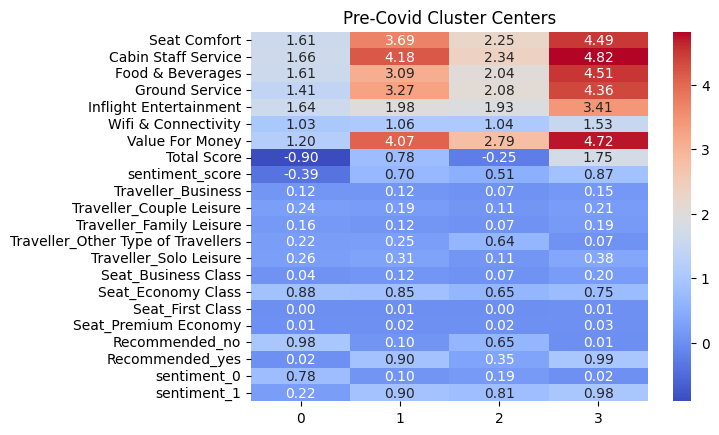

In [ ]:
import seaborn as sns
# create a DataFrame of cluster centers. Note that row 0 corresponds to cluster label = 0
# using a heatmap, we will look at the profile of each of the clusters and draw insights

pre_clust_means = pd.DataFrame(kmeans_cluster_pre.cluster_centers_, columns=prepared_clustering_pre_covid.columns)
sns.heatmap(pre_clust_means.T, cmap='coolwarm', annot=True, fmt='.2f')
plt.title('Pre-Covid Cluster Centers')

KMeans clustering for post-covid data

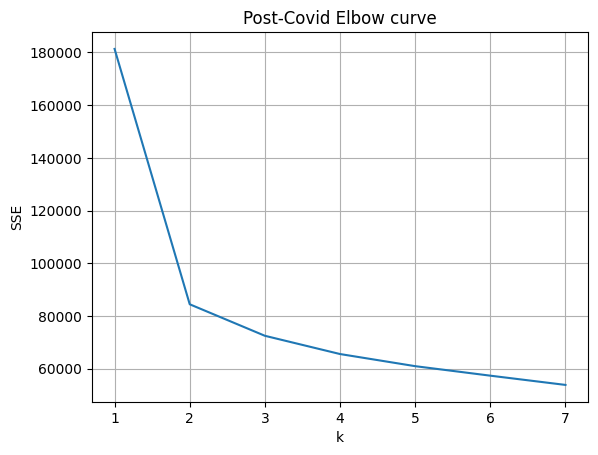

In [ ]:
SSE = []
for i in range(1, 8):
    model_i = KMeans(n_clusters=i, random_state=42)
    model_i.fit(prepared_clustering_post_covid)
    SSE.append(model_i.inertia_)

# Plot the elbow curve

k = (range(1,8))
plt.plot(k, SSE)

plt.title('Post-Covid Elbow curve')
plt.xlabel('k')
plt.ylabel('SSE')
plt.grid(True)
plt.show()

In [ ]:
kmeans_cluster_post = KMeans(n_clusters=4, random_state=42)
kmeans_cluster_post.fit(prepared_clustering_post_covid)

KMeans(n_clusters=4, random_state=42)

In [ ]:
print("Attributes of the clustering solution for k=4 in the post-covid data:")
print("SSE :", round(kmeans_cluster_post.inertia_, 1))
print("Num of iterations :" , kmeans_cluster_post.n_iter_)
print("\nCluster centers :" , kmeans_cluster_post.cluster_centers_)

Attributes of the clustering solution for k=4 in the post-covid data:
SSE : 65539.3
Num of iterations : 7

Cluster centers : [[ 2.73361934e+00  3.21294852e+00  2.25273011e+00  1.94812793e+00
   2.20592824e+00  1.30850234e+00  2.07995320e+00  1.04542370e-01
  -7.29059672e-02  1.47425897e-01  2.65990640e-01  2.31669267e-01
   2.77826807e-18  3.54914197e-01  1.17004680e-01  8.35413417e-01
   8.19032761e-03  3.93915757e-02  8.98205928e-01  1.01794072e-01
   5.60842434e-01  4.39157566e-01]
 [ 4.42031250e+00  4.75000000e+00  4.30468750e+00  4.46250000e+00
   4.17656250e+00  4.35468750e+00  4.54531250e+00  2.19353359e+00
   8.05914063e-01  1.28125000e-01  2.40625000e-01  2.35937500e-01
  -7.72494048e-19  3.95312500e-01  2.51562500e-01  6.62500000e-01
   3.12500000e-02  5.46875000e-02  5.62500000e-02  9.43750000e-01
   5.00000000e-02  9.50000000e-01]
 [ 1.47207884e+00  1.49945253e+00  1.58579697e+00  1.27921164e+00
   1.66713593e+00  1.04113875e+00  1.14734866e+00 -7.22949047e-01
  -3.73566870

In [ ]:
post_clust_means = pd.DataFrame(kmeans_cluster_post.cluster_centers_, columns=prepared_clustering_post_covid.columns)
sns.heatmap(post_clust_means.T, cmap='coolwarm', annot=True, fmt='.2f')
plt.title('Post-Covid Cluster Centers')

Text(0.5, 1.0, 'Post-Covid Cluster Centers')

Creation of the GM Models

In [ ]:
from sklearn.mixture import GaussianMixture as GMM
import plotly.graph_objs as go
bic = []
for i in range(1, 11):
    gm = GMM(n_components=i, covariance_type="full", max_iter=300, random_state=42)
    gm.fit(prepared_clustering_pre_covid)
    b = gm.bic(prepared_clustering_pre_covid)
    bic.append(b)
fig = go.Figure(data=go.Scatter(x=np.arange(1,11), y=bic))
fig.update_layout(title='Pre-Covid BIC',
                xaxis_title='Numbe of Clusters',
                yaxis_title='BIC')
fig.show()

In [ ]:
gmm = GMM(n_components=4, max_iter=300, random_state=42)
gmm.fit(prepared_clustering_pre_covid)
GMM_prepared_clustering_pre_covid = prepared_clustering_pre_covid.copy()
GMM_prepared_clustering_pre_covid['Segment'] = gmm.predict(prepared_clustering_pre_covid)

Text(0.5, 1.0, 'Pre-Covid Cluster Centers')

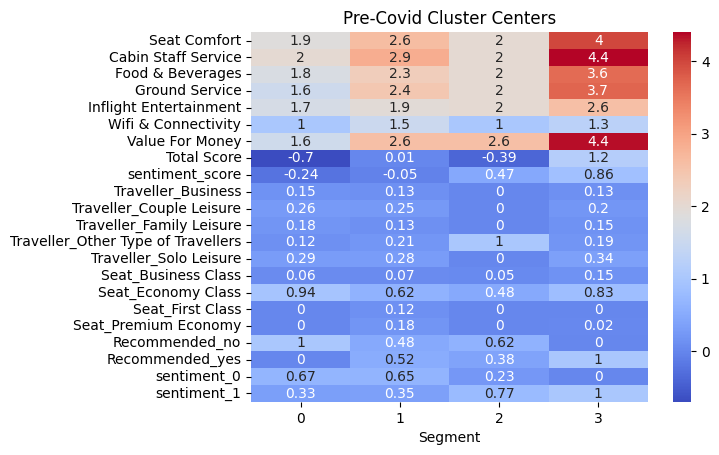

In [ ]:
# using a heatmap, show the profile for each of the segments ignoring the 'Segment' column

pre_segment_means = pd.DataFrame(GMM_prepared_clustering_pre_covid.groupby(['Segment']).mean().round(2))
sns.heatmap(pre_segment_means.T, cmap='coolwarm', annot=True)
plt.title('Pre-Covid Cluster Centers')


In [ ]:
bic = []
for i in range(1, 11):
    gm = GMM(n_components=i, covariance_type="full", max_iter=300, random_state=42)
    gm.fit(prepared_clustering_post_covid)
    b = gm.bic(prepared_clustering_post_covid)
    bic.append(b)
fig = go.Figure(data=go.Scatter(x=np.arange(1,11), y=bic))
fig.update_layout(title='Post-Covid BIC',
                xaxis_title='Numbe of Clusters',
                yaxis_title='BIC')
fig.show()

Text(0.5, 1.0, 'Post-Covid Cluster Centers')

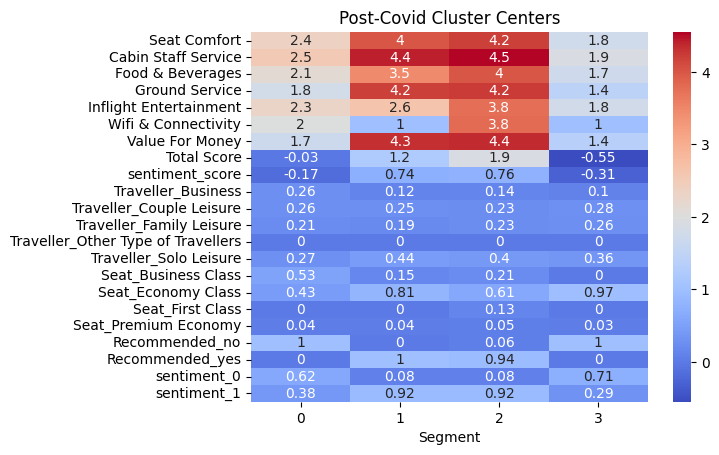

In [ ]:
gmm = GMM(n_components=4, max_iter=300, random_state=42)
gmm.fit(prepared_clustering_post_covid)
GMM_prepared_clustering_post_covid = prepared_clustering_post_covid.copy()
GMM_prepared_clustering_post_covid['Segment'] = gmm.predict(prepared_clustering_post_covid)

post_segment_means = pd.DataFrame(GMM_prepared_clustering_post_covid.groupby(['Segment']).mean().round(2))
sns.heatmap(post_segment_means.T, cmap='coolwarm', annot=True)
plt.title('Post-Covid Cluster Centers')

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=4e2d7258-be81-4486-bc85-234b0cc7a7d6' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>